<a href="https://colab.research.google.com/github/CVanchieri/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/IntroductiontoBayesianInference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

In [0]:
# import the libraries necessary.
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

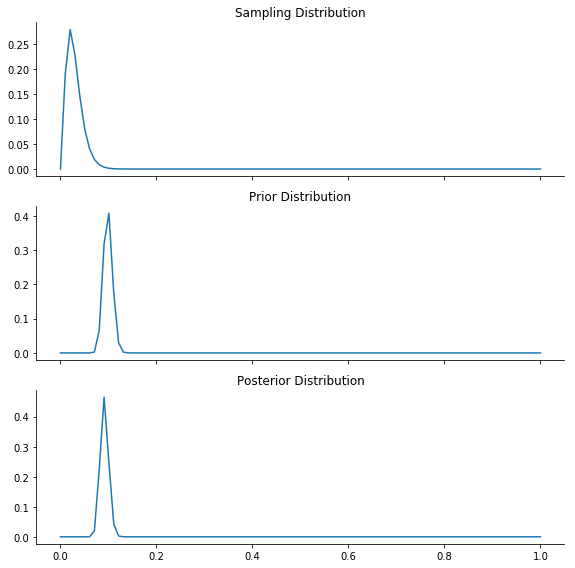

In [11]:
# create a fucntion to find a 'posterior distribution' using the 'bayesian' approach.
def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk):
    n_params=100
    n_sample=100
    params = np.linspace(0, 1, n_params)
# create the 'sample' distribution for likelihood.
    sample = np.random.binomial(n=1, p=prob_positive_drunk, size=n_sample)
    likelihood = np.array([np.product(st.bernoulli.pmf(sample, p)) for p in params])
    likelihood = likelihood / np.sum(likelihood)
# create the 'prior sample' distribution for prior.
    prior_sample = np.random.binomial(n=1, p=prob_drunk_prior, size=prob_positive)
    prior = np.array([np.product(st.bernoulli.pmf(prior_sample, p)) for p in params])
    prior = prior / np.sum(prior)
# create the 'posterior sample' distribution for posterior.
    posterior = [prior[i] * likelihood[i] for i in range(prior.shape[0])]
    posterior = posterior / np.sum(posterior)
# set the shape, size for the graphs.
    fig, axes = plt.subplots(3, 1, sharex=True, figsize=(8,8))
# plot the liklihood data.
    axes[0].plot(params, likelihood)
    axes[0].set_title("Sampling Distribution")
# plot the prior data.
    axes[1].plot(params, prior)
    axes[1].set_title("Prior Distribution")
# plot the posterior data.
    axes[2].plot(params, posterior)
    axes[2].set_title("Posterior Distribution")
    sns.despine()
    plt.tight_layout()
     
    return posterior
# set the known information.
p_drunk_prior = .08
p_pos = 1000
p_positive_drunk = .0125
example_post = prob_drunk_given_positive(p_drunk_prior, p_pos, p_positive_drunk)

In [0]:
# create a function to find a confidence interval '%95' using the 'frequentist' approach.
def confidence_interval(data, confidence=0.95):
# label the length of the data.  
  n = len(data)
# label the mean of the data.
  mean = sum(data)/n
# set the data to an 'array'.
  data = np.array(data)
# label the standard error of the data.
  stderr = stats.sem(data)
# create the interval.
  interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n-1)
  return(mean, mean - interval, mean + interval)

# create our sample data.
sample_means = []
for x in range(0,100):
  sample = np.random.binomial(n=1, p=.0125, size=100)
  sample_means.append(sample.mean())

l_mean, low_int, high_int = confidence_interval(sample_means)

In [0]:
# import sns for graphs.
import seaborn as sns

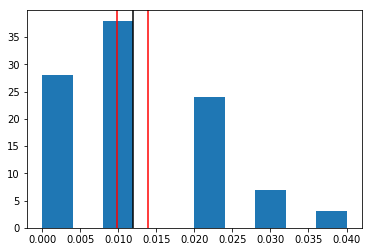

In [8]:
# Plot the data from the 'frequentist' approach.
plt.hist(sample_means)
plt.axvline(x=l_mean, color='k')
plt.axvline(x=low_int, color='r')
plt.axvline(x=high_int, color='r')

###Explanation of Frequentist vs. Bayesian
A frequentist calculates a probablity of an unknown constant in a specific range (confidence interval) and the value is either in the range is not in the range. 

A Bayesian apporach uses prior knowledge (prior distribution) and updates that distribution using sample data to create a posterior distribution. 

Both arrive at probability in a specific range (confidence interval).

##Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

###Use SciPy stats.bayes_mvs.

In [9]:
import numpy as np
import pandas as pd

# Average Height
mu = 70
sigma = 3

# Create a sample of 500 heights
lambda_heights = np.random.normal(mu, sigma, 500)
mean, var, std = stats.bayes_mvs(lambda_heights)
print('Mean: ', mean)
print('Variance:', var)
print('Std Dev: ', std)

Mean:  Mean(statistic=69.90361264072534, minmax=(69.68151342218127, 70.12571185926942))
Variance: Variance(statistic=9.118841582996515, minmax=(8.209149805193107, 10.111727314920948))
Std Dev:  Std_dev(statistic=3.0182233710200337, minmax=(2.86516139252104, 3.179894230146806))


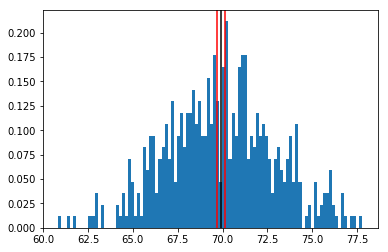

In [10]:
# Plot the mean and confidence interval
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(lambda_heights, bins=100, density=True, label='Histogram of data')
plt.axvline(x=mean.statistic, color='k')
plt.axvline(x=mean.minmax[0], color='r')
plt.axvline(x=mean.minmax[1], color='r')
plt.show()

###Bayesian model for a 50/50 coinflip.

In [0]:
# import the libraries necessary.
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

# Create 1000 random coin flips.
data_coin_flips = np.random.randint(2, size=1000)
# show the 'mean' of the coin flips.
np.mean(data_coin_flips)

0.5

In [0]:
# create a sample Bernoulli distribution of 1000 coin flips, equal probability at 'p=.5'.
bernoulli_flips = np.random.binomial(n=1, p=.5, size=1000)
# show the 'mean' of the bern coin flips.
np.mean(bernoulli_flips)

0.476

In [0]:
# use a probability mass function (pmf) of the Bernoulli distribution to calc probability of seeing all data points
np.product(st.bernoulli.pmf(data_coin_flips, .5))

9.332636185032189e-302

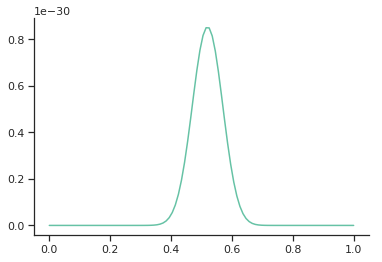

In [0]:
# set the style we want to use.
sns.set(style='ticks', palette='Set2')
 params = np.linspace(0, 1, 100)
# set the test n, p, size.
test = np.random.binomial(n=1, p=.5, size=100)
# create an array of all the test results.
p_x = np.array([np.product(st.bernoulli.pmf(test, p)) for p in params])
# plot the test results.
plt.plot(params, p_x)
sns.despine()

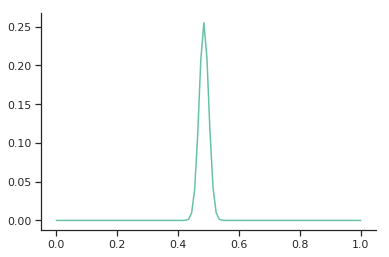

In [0]:
# create an example for a 'fair flips' with a 'p=.5'.
fair_flips = bernoulli_flips = np.random.binomial(n=1, p=.5, size=1000)
p_fair = np.array([np.product(st.bernoulli.pmf(fair_flips, p)) for p in params])
p_fair = p_fair / np.sum(p_fair)
plt.plot(params, p_fair)
sns.despine()

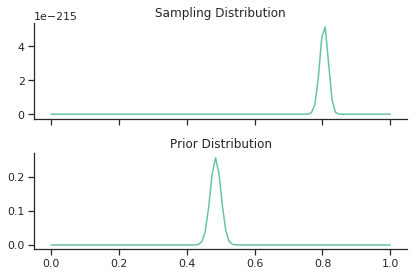

In [0]:
# create an example of 'unfair flips' with a 'p=.8'.
unfair_flips = bernoulli_flips = np.random.binomial(n=1, p=.8, size=1000)
p_unfair = np.array([np.product(st.bernoulli.pmf(unfair_flips, p)) for p in params])
# label & titles for the graph.
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(params, p_unfair)
axes[0].set_title("Sampling Distribution")
axes[1].plot(params, p_fair)
axes[1].set_title("Prior Distribution")
sns.despine()
plt.tight_layout()

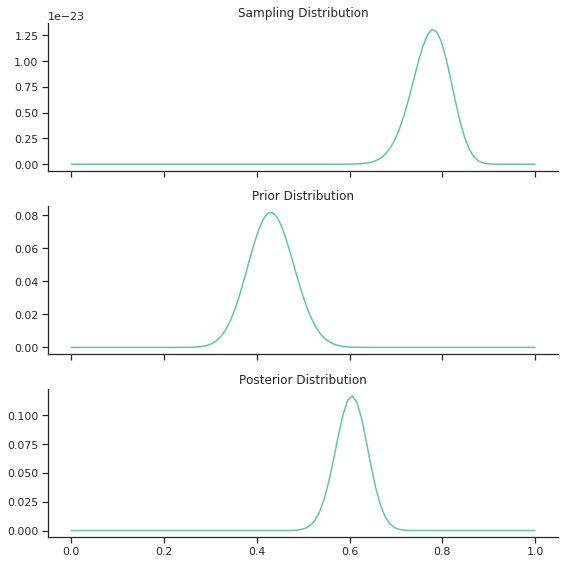

In [0]:
# create a function to use 'bayes' theorem for coinflips data.
def bern_post(n_params=100, n_sample=100, true_p=.8, prior_p=.5, n_prior=100):
    params = np.linspace(0, 1, n_params)
    sample = np.random.binomial(n=1, p=true_p, size=n_sample)
    likelihood = np.array([np.product(st.bernoulli.pmf(sample, p)) for p in params])
    #likelihood = likelihood / np.sum(likelihood)
    prior_sample = np.random.binomial(n=1, p=prior_p, size=n_prior)
    prior = np.array([np.product(st.bernoulli.pmf(prior_sample, p)) for p in params])
    prior = prior / np.sum(prior)
    posterior = [prior[i] * likelihood[i] for i in range(prior.shape[0])]
    posterior = posterior / np.sum(posterior)
     # label & titles for the graph.
    fig, axes = plt.subplots(3, 1, sharex=True, figsize=(8,8))
    axes[0].plot(params, likelihood)
    axes[0].set_title("Sampling Distribution")
    axes[1].plot(params, prior)
    axes[1].set_title("Prior Distribution")
    axes[2].plot(params, posterior)
    axes[2].set_title("Posterior Distribution")
    sns.despine()
    plt.tight_layout()
    return posterior
1
example_post = bern_post()

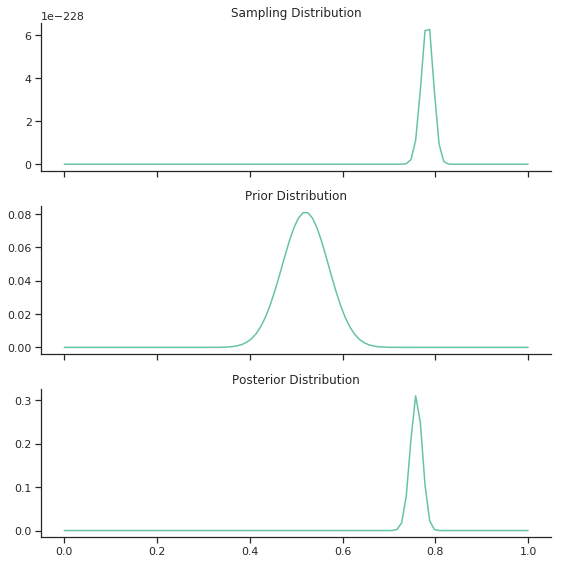

In [0]:
# more samples typically decreases the spread of a distribution.
= bern_post(n_sample=1000)